# Plot shear traction history

2024.9.11 Kurama Okubo

We computed the shear traction history in `03_plot_snapshots_mastercase.ipynb` to show the friction self-healing. In this notebook, we compare the traction obtained by the dynamic ruptur modeling with and without self-healing.

- 2025.1.30 Clean up the notebook for the master plot.

In [14]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import matplotlib as mpl

%matplotlib inline
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm import tqdm
import warnings
import time

from importParaviewColormap import importParaviewColormap
import seaborn as sns
from matplotlib.collections import LineCollection

%load_ext autoreload
%autoreload 2


plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 10
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 4.75
plt.rcParams["xtick.major.width"] = 0.75
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["xtick.minor.width"] = 0.4
plt.rcParams["xtick.minor.visible"] = True

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 4.75
plt.rcParams["ytick.major.width"] = 0.75
plt.rcParams["ytick.minor.size"] = 3
plt.rcParams["ytick.minor.width"] = 0.4
plt.rcParams["ytick.minor.visible"] = True

plt.rcParams["savefig.transparent"] = True

plt.rcParams['axes.linewidth'] = 0.75

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
figdir = "../figure/04_tractionhistory"
if not os.path.exists(figdir):
    os.makedirs(figdir)

In [16]:
# case study parameter casename

a_patch = 4.0e-3
a_nuc = 2.5e-3
a_margin = 4.08e-3

# rupturetype = "crack"
pdcscaling = 0.6 #0.65
bgbeta=0.35

nb_x_elements = 128 #1024
nb_z_elements = 128 #1024

IfBinaryOutput = True

sig_n = 6e6

casestr_pulse = f"a={a_patch*1e3:.2f}_ruptype={'pulse'}_pdcscaling={pdcscaling:.3f}_sn={sig_n/1e6:.1f}MPa_hatfr=0.3_bgbeta={bgbeta:.2f}"
casestr_crack = f"a={a_patch*1e3:.2f}_ruptype={'crack'}_pdcscaling={pdcscaling:.3f}_sn={sig_n/1e6:.1f}MPa_hatfr=0.3_bgbeta={bgbeta:.2f}"

Ifmasteroutput=True # add file key to the master output
if Ifmasteroutput:
    filekey = "_master"
else:
    filekey = ""
    
# Read model parameters
df_modelparam = pd.read_csv(f"../../preprocess_modelsetup/data/gouge_dynamicrupture_modelparam_{casestr_pulse}{filekey}.csv", index_col=0)


# Read data

In [17]:
gougeevent_id = 129
traction_loc = [1.5e-3, 0.0e-3] # should be used as same location of 03_plot_snapshots_mastercase.ipynb

In [18]:
df_tractionhistory_pulse = pd.read_csv(f"../data/tractionhistory_{gougeevent_id}_{casestr_pulse}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}mm{filekey}.csv", index_col=0)
df_tractionhistory_crack = pd.read_csv(f"../data/tractionhistory_{gougeevent_id}_{casestr_crack}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}mm{filekey}.csv", index_col=0)

# Plot comparison

In [19]:
df_tractionhistory_pulse

,t,loc_slip,loc_traction
0,0.000000e+00,0.000000e+00,4787688.5
1,9.777979e-09,-1.186204e-25,4787688.5
2,1.955596e-08,-3.354249e-25,4787688.5
3,2.933394e-08,-4.126564e-25,4787688.5
4,3.911191e-08,-4.654145e-25,4787688.0
...,...,...,...
609,5.954789e-06,3.947093e-07,2488131.2
610,5.964567e-06,3.947093e-07,2488041.0
611,5.974345e-06,3.947093e-07,2487945.8
612,5.984123e-06,3.947093e-07,2487840.2


In [20]:
# lc = sns.color_palette("colorblind", as_cmap=False)
# lc

In [21]:
df_modelparam.columns

Index(['M0_mean', 'Tw_mean', 'Mw_mean', 'hat_sn_patch', 'hat_sn_background',
       'delsig_withmargin_try', 'slip_try', 'initialstress_fraction',
       'delsigma_factor', 'fp_patch', 'hat_fr', 'hat_fp_background',
       'hat_fr_background', 'dc_try', 'hat_ds_factor_rapidnuc_nuc',
       'hat_ds_factor_rapidnuc_patch', 'tau_c_nuc', 'tau_r_nuc', 'tau_c_patch',
       'tau_r_patch', 'tau_c_background', 'tau_r_background', 'tau_0_nuc',
       'tau_0_patch', 'tau_0_background', 'GIIC_nuc', 'GIIC_patch',
       'GIIC_background', 'Sratio_nuc', 'Sratio_patch', 'Ainit_nuc',
       'Ainit_patch', 'Anuc_nuc', 'Anuc_patch', 'rnuc_nuc', 'rnuc_patch'],
      dtype='object')

In [22]:
df_event = df_modelparam.loc[gougeevent_id, :]

In [23]:
dc = df_event["dc_try"]
ds = df_event["hat_ds_factor_rapidnuc_patch"]*dc
print(dc*1e6, ds*1e6)

0.07126367800000001 0.39195022900000004


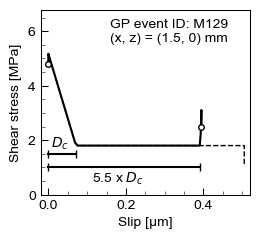

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.495))

ax.plot(df_tractionhistory_crack["loc_slip"]*1e6, df_tractionhistory_crack["loc_traction"]/1e6, "--", c="k", lw=1.0)
ax.plot(df_tractionhistory_pulse["loc_slip"]*1e6, df_tractionhistory_pulse["loc_traction"]/1e6, "-", c="k", zorder=2, lw=1.5)

# add markers at the beginning and end of the time history
slip_init = df_tractionhistory_pulse["loc_slip"].iloc[0]
slip_end = df_tractionhistory_pulse["loc_slip"].iloc[-1]
traction_init =  df_tractionhistory_pulse["loc_traction"].iloc[0]
traction_end =  df_tractionhistory_pulse["loc_traction"].iloc[-1]

ax.plot(np.array([slip_init, slip_end])*1e6, np.array([traction_init, traction_end])/1e6, "o", mfc="w", mec="k", zorder=3, markersize=4)

ax.set_xlim([-0.02, 0.52])
ax.set_ylim([0, 6.8]) # synchronize with the initial stress condition plot
ax.set_xlabel("Slip [μm]")
ax.set_ylabel("Shear stress [MPa]")

# annotation
dc_y = 1.5 
ds_y = 1
ax.plot([0, dc*1e6], [dc_y, dc_y], "-", marker="|", c="k" )
ax.plot([0, ds*1e6], [ds_y, ds_y], "-", marker="|", c="k" )
ax.text(0.18, ds_y-0.55, f"{df_event['hat_ds_factor_rapidnuc_patch']} x $D_c$", ha="center")
ax.text(0.03, dc_y+0.25, f"$D_c$", ha="center")

# annotate the location info
loc_info_txt = '\n'.join((f"GP event ID: M{gougeevent_id}",
                          f"(x, z) = ({traction_loc[0]*1e3:.1f}, {traction_loc[1]*1e3:.1g}) mm"))
ax.text(0.33, 0.95, loc_info_txt, transform=ax.transAxes, #fontsize=10,
        verticalalignment='top', bbox=None)


plt.tight_layout()
plt.savefig(figdir + f"/master_traction_history_comparison_{gougeevent_id}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}{filekey}mm.png", dpi=300, bbox_inches="tight")
plt.savefig(figdir + f"/master_traction_history_comparison_{gougeevent_id}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}{filekey}mm.pdf", bbox_inches="tight")

# plt.close()
# plt.clf()

In [25]:
df_tractionhistory_pulse["loc_slip"].iloc[0]

0.0

# Plot time-traction history

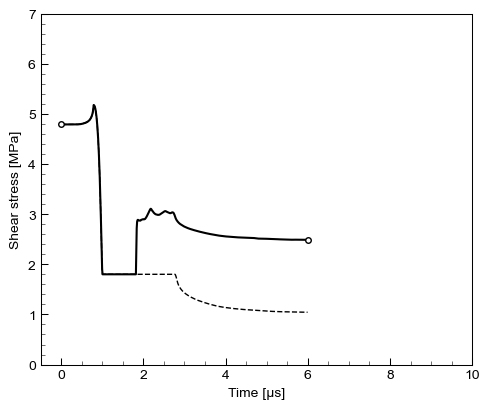

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.2))

ax.plot(df_tractionhistory_crack["t"]*1e6, df_tractionhistory_crack["loc_traction"]/1e6, "--", c="k", lw=1.0)
ax.plot(df_tractionhistory_pulse["t"]*1e6, df_tractionhistory_pulse["loc_traction"]/1e6, "-", c="k", zorder=2, lw=1.5)

# add markers at the beginning and end of the time history
t_init = df_tractionhistory_pulse["t"].iloc[0]
t_end = df_tractionhistory_pulse["t"].iloc[-1]
traction_init =  df_tractionhistory_pulse["loc_traction"].iloc[0]
traction_end =  df_tractionhistory_pulse["loc_traction"].iloc[-1]

ax.plot(np.array([t_init, t_end])*1e6, np.array([traction_init, traction_end])/1e6, "o", mfc="w", mec="k", zorder=3, markersize=4)

ax.set_xlim([-0.5, 10])
ax.set_ylim([0, 7])
ax.set_xlabel("Time [μs]")
ax.set_ylabel("Shear stress [MPa]")

# annotation
# dc_y = 1.5 
# ds_y = 1
# ax.plot([0, dc*1e6], [dc_y, dc_y], "-", marker="|", c="k" )
# ax.plot([0, ds*1e6], [ds_y, ds_y], "-", marker="|", c="k" )
# ax.text(0.18, ds_y-0.4, f"{df_event['hat_ds_factor_rapidnuc_patch']} x $D_c$")
# ax.text(0.02, dc_y+0.3, f"$D_c$")

plt.tight_layout()
plt.savefig(figdir + f"/master_time_traction_{gougeevent_id}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}{filekey}mm.png", dpi=300, bbox_inches="tight")
plt.savefig(figdir + f"/master_time_traction_{gougeevent_id}_x{traction_loc[0]*1e3:.2f}mm_z{traction_loc[1]*1e3:.2f}{filekey}mm.pdf", bbox_inches="tight")

# plt.close()
# plt.clf()